<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Ignacio Aedo;201773556-2;Malla Nueva</h3>
    <h3 align="center">Ethiel Carmona;201773533-3;Malla Nueva</h3>
    <h3 align="center">Abril 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 3 de Mayo.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**


---
## 1. Retención de Clientes

La fuga (*churn*, término en inglés) de clientes es algo que muchas empresas de hoy en día sufren, la fuga puede deberse a muchos factores, uno de estos podría ser alguna característica del servicio en sí que provee la empresa. En esta sección usted trabajará con un dataset de "Telco", una empresa de telecomunicaciones, donde verá varios datos relacionados al plan de los clientes, uno de estos campos siendo "*Churn*", si el cliente se fugó o no. 

El archivo a utilizar es "churn.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/blastchar/telco-customer-churn)

>a) Haga un análisis exploratorio **a su criterio** del dataset y extraiga 3 conclusiones acerca del conjunto de datos

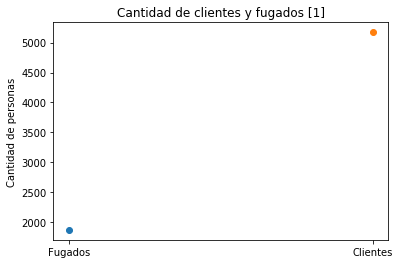

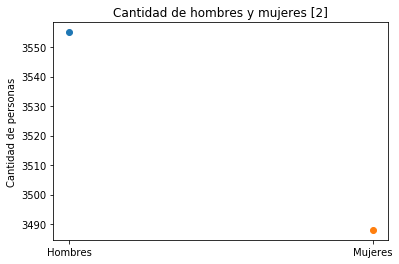

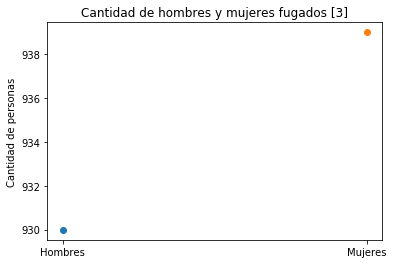

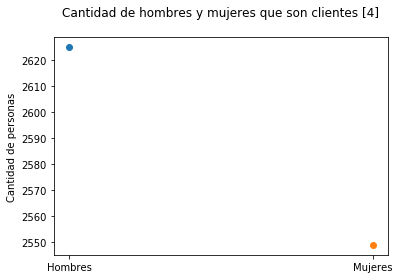

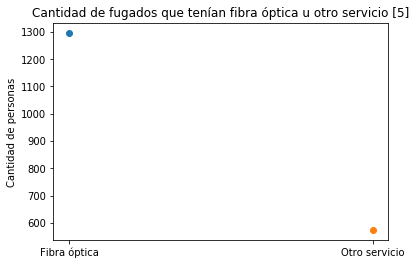

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
data=pd.read_csv('churn.csv')
fugados=data[data.Churn=='Yes']
noFugados=data[data.Churn=='No']
#graficamos los distintos datos que nos entrega el .csv a través de pandas
#plt.subplot(3,2,1)
plt.title('Cantidad de clientes y fugados [1]')
plt.scatter('Fugados',fugados.Churn.size)
plt.scatter('Clientes',noFugados.Churn.size)
plt.ylabel('Cantidad de personas')
plt.show()
#plt.subplot(3,2,2)
plt.title('Cantidad de hombres y mujeres [2]')
m=data[data.gender=='Female']
h=data[data.gender=='Male']
plt.scatter('Hombres',h.gender.size)
plt.scatter('Mujeres',m.gender.size)
plt.ylabel('Cantidad de personas')
plt.show()

#plt.subplot(3,2,3)
plt.title('Cantidad de hombres y mujeres fugados [3]')
m=data[(data.gender=='Female') & (data.Churn=='Yes')]
h=data[(data.gender=='Male') & (data.Churn=='Yes')]
plt.scatter('Hombres',h.gender.size)
plt.scatter('Mujeres',m.gender.size)
plt.ylabel('Cantidad de personas')
plt.show()
#plt.subplot(3,2,4)
plt.title('Cantidad de hombres y mujeres que son clientes [4]\n')
m=data[(data.gender=='Female') & (data.Churn=='No')]
h=data[(data.gender=='Male') & (data.Churn=='No')]
plt.scatter('Hombres',h.gender.size)
plt.scatter('Mujeres',m.gender.size)
plt.ylabel('Cantidad de personas')
plt.show()
#plt.subplot(3,2,5)
plt.title('Cantidad de fugados que tenían fibra óptica u otro servicio [5]')
conFibra=data[(data.InternetService=='Fiber optic') & (data.Churn=='Yes')]
sinFibra=data[(data.InternetService!='Fiber optic') & (data.Churn=='Yes')]
plt.scatter('Fibra óptica',conFibra.gender.size)
plt.scatter('Otro servicio',sinFibra.gender.size)
plt.ylabel('Cantidad de personas')
#plt.subplots_adjust(wspace=5,hspace=10,top=1,left=0.1)
plt.show()

A partir de los gráficos generados, podemos observar los siguientes puntos:

1.- En el gráfico [1] podemos observar que la empresa posee un porcentaje de fuga importante que le podría provocar problemas económicos, esto haciendo una aproximación de los datos mostrados.

2.- Podemos observar que existe una mayor cantidad de hombres que mujeres dentro de la muestra. 

Otro aspecto importante a destacar, es la participación por género en las fugas. Resulta que la gran mayoría de fugados son mujeres, mientras que la mayor cantidad de hombres permanecen como clientes. A partir de esta información podemos suponer que existen características que impulsan a las mujeres a abandonar la empresa.

3.-Finalmente, en el gráfico [5] vemos una clara tendencia que indica una relación entre el servicio de fibra óptica y la posibilidad de fugarse. Esto da indicios de que el servicio entregado puede presentar problemas para el usuario, lo que lo lleva a dejar la empresa.

> b.1) Determine la probabilidad de que: <ul>
    <li>Un cliente sea mujer dado que tiene fibra óptica </li>
    <li>Un cliente sea hombre dado que tiene fibra óptica</li>
    <li>Un cliente sea mujer dado que no tiene fibra óptica</li>
    <li>Un cliente sea hombre dado que no tiene fibra óptica</li>
    </ul>
    Además indique cuál/es de estos pares deben sumar 1 (Si es que algún par debe sumar esta cantidad). Justifique su respuesta.
    

Para realizar los siguientes cálculos de probabilidad condicional consideraremos como clientes tanto a no fugados como fugados.

1) Probabilidad que un cliente sea mujer dado que tiene fibra óptica:

In [2]:
#de aqui en adelante, filtramos los datos para obtener la caracteristica de interes y calcular las probabilidades
totalEntradas=data.gender.size #cantidad de clientes 
d1=data[(data.gender=='Female') & (data.InternetService=='Fiber optic')]
interseccion=d1.gender.size #cantidad de mujeres que tienen fibra óptica
d2=data[(data.InternetService=='Fiber optic')]
clientesFO=d2.InternetService.size #cantidad de clientes con fibra óptica
uno=(interseccion/totalEntradas)/(clientesFO/totalEntradas)
print("La probabilidad es: ",uno)

La probabilidad es:  0.5016149870801033


2) Probabilidad que un cliente sea hombre dado que tiene fibra óptica:

In [3]:
d1=data[(data.gender=='Male') & (data.InternetService=='Fiber optic')]
interseccion=d1.gender.size #cantidad de hombres que tienen fibra óptica
dos=(interseccion/totalEntradas)/(clientesFO/totalEntradas)
print("La probabilidad es: ",dos)

La probabilidad es:  0.4983850129198967


3) Probabilidad que un cliente sea mujer dado que no tiene fibra óptica:

In [4]:
d1=data[(data.gender=='Female') & (data.InternetService!='Fiber optic')]
interseccion=d1.gender.size #cantidad de mujeres que NO tienen fibra óptica
d2=data[(data.InternetService!='Fiber optic')]
clientesSinFO=d2.InternetService.size #cantidad de clientes sin fibra óptica
tres=(interseccion/totalEntradas)/(clientesSinFO/totalEntradas)
print("La probabilidad es: ",tres)

La probabilidad es:  0.49024575627058525


4) Probabilidad que un cliente sea hombre dado que no tiene fibra óptica:

In [5]:
d1=data[(data.gender=='Male') & (data.InternetService!='Fiber optic')]
interseccion=d1.gender.size #cantidad de hombres que NO tienen fibra óptica
cuatro=(interseccion/totalEntradas)/(clientesSinFO/totalEntradas)
print("La probabilidad es: ",cuatro)

La probabilidad es:  0.5097542437294148


Luego podemos observar que las probabilidades calculadas en 1 y 2, y las probabilidades calculadas en 3 y 4 deben sumar uno respectivamente, ya que 1 y 2 son particiones de un mismo conjunto y juntas forman el conjunto completo. Lo mismo para 3 y 4.

In [6]:
print("La suma de 1 y 2: ",uno+dos)
print("La suma de 3 y 4: ",tres+cuatro)

La suma de 1 y 2:  1.0
La suma de 3 y 4:  1.0


>b.2) ¿Es posible concluir que si un cliente es hombre tiene más probabilidad de tener fibra óptica? ¿Y si es mujer? ¿Por qué?

A partir de las probabilidades calculadas en b.1) no podemos concluir que un hombre tiene más probabilidades de tener fibra óptica ni viceversa. Para esto habría que realizar un nuevo cálculo mostrado a continuación:

In [7]:
d1=data[(data.gender=='Male') & (data.InternetService=='Fiber optic')]
interseccion=d1.gender.size #cantidad de hombres que tienen fibra óptica
d2=data[(data.gender=='Male')]
clientesHombres=d2.gender.size #cantidad de clientes hombres
tres=(interseccion/totalEntradas)/(clientesHombres/totalEntradas)
print("La probabilidad de que tenga fibra óptica dado que es hombre es: ",tres)
print("La probabilidad de que tenga fibra óptica dado que es mujer es: ",1-tres)

La probabilidad de que tenga fibra óptica dado que es hombre es:  0.4340365682137834
La probabilidad de que tenga fibra óptica dado que es mujer es:  0.5659634317862166


Por lo tanto, a partir del resultado obtenido, podemos concluir que es más probable que tenga fibra óptica dado que es mujer.

>c) Utilizando criterios de probabilidad condicional ¿Hay algún servicio de internet más propenso a la fuga?

Calcularemos la probabilidad de fuga dado que el cliente posee fibra óptica, DSL o no tiene ningún servicio de internet contratado.

In [8]:
d1=data[(data.Churn=='Yes') & (data.InternetService=='Fiber optic')]
interseccion=d1.Churn.size #cantidad de fugados que tienen fibra óptica
d2=data[(data.InternetService=='Fiber optic')]
clientesFB=d2.InternetService.size #cantidad de personas que poseen fibra óptica
tres=(interseccion/totalEntradas)/(clientesFB/totalEntradas)
print("La probabilidad que se haya fugado dado que tiene fibra óptica es: ",tres)

d1=data[(data.Churn=='Yes') & (data.InternetService=='DSL')]
interseccion=d1.Churn.size #cantidad de fugados que tienen DSL
d2=data[(data.InternetService=='DSL')]
clientesDSL=d2.InternetService.size #cantidad de personas que poseen DSL
tres=(interseccion/totalEntradas)/(clientesDSL/totalEntradas)
print("La probabilidad que se haya fugado dado que tiene DSL es: ",tres)

d1=data[(data.Churn=='Yes') & (data.InternetService=='No')]
interseccion=d1.Churn.size #cantidad de fugados que no tienen ningun servicio
d2=data[(data.InternetService=='No')]
clientesNada=d2.InternetService.size #cantidad de personas que no poseen ningun servicio
tres=(interseccion/totalEntradas)/(clientesNada/totalEntradas)
print("La probabilidad que se haya fugado dado que no tiene servicio contratado es: ",tres)

La probabilidad que se haya fugado dado que tiene fibra óptica es:  0.4189276485788114
La probabilidad que se haya fugado dado que tiene DSL es:  0.18959107806691447
La probabilidad que se haya fugado dado que no tiene servicio contratado es:  0.07404980340760157


Observando los resultados, existe una probabilidad de fugarse de un 40% teniendo fibra óptica, lo cual nos indica que aquellos usuarios con fibra óptica no se sienten a gusto con el servicio, sendo más propensos a fugarse.

>d) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la fuga? y ¿es la fuga un buen predictor del cargo mensual de un cliente?

Para responder a esta pregunta, se calcularán dos probabilidades condicionales: la probabilidad de fuga dado un cargo mensual mayor al promedio y la probabilidad de tener un cargo mensual mayor al promedio dado que el cliente se fugó. Utilizaremos el filtro de mayor al promedio del cargo mensual ya que es más intuitivo pensar que si el cargo mensual es muy alto el cliente se fugará (supuesto).
    

1) Probabilidad de fuga dado un cargo mensual mayor al promedio:

In [9]:
cargoPromedio=data['MonthlyCharges'].mean() #promedio de los cargos mensuales
interseccion=data[(data.Churn=='Yes')&(data.MonthlyCharges>cargoPromedio)] #intersección entre fugados y gente con cargo mayor al promedio
d2=data[data.MonthlyCharges>cargoPromedio] #gente con cargo mayor al promedio
print("La probabilidad es: ",interseccion.Churn.size/d2.MonthlyCharges.size)

La probabilidad es:  0.3453989293907724


2) Probabilidad de cargo mensual mayor al promedio dado que el cliente se fugó:

In [10]:
interseccion=data[(data.Churn=='Yes')&(data.MonthlyCharges>cargoPromedio)] #intersección entre fugados y gente con 
d2=data[data.Churn=='Yes'] #gente que se fugó
print("La probabilidad es: ",interseccion.MonthlyCharges.size/d2.Churn.size)

La probabilidad es:  0.7249866238630284


A partir de los datos mostrados, podemos observar que existe un 72% de probabilidad de que el cliente fugado tenga un cargo mensual mayor al promedio y un 34% de probabilidad de que aquel cliente con cargo mensual mayor al promedio se fuge. Dicho esto, podemos concluir que el cargo mensual sí es un buen predictor de fuga, ya que dado un alto cargo mensual, la probabilidad de fuga es muy alta en este contexto (poco más de 1/3) lo que no es rentable para una empresa (tener una probabilidad de fuga tan alta en tal rango). Finalmente, la fuga también es un buen indicador del cargo mensual, dado que más de 2/3 de los fugados tenía cargo mensual mayor al promedio.

>e) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la estadia de un cliente? y ¿es la estadia del cliente un buen predictor del cargo mensual de este?

*Estadia*: tenure

Al igual que en el inciso anterior, se calculará dos probabilidades condicionales: la probabilidad de que un cliente se mantenga más que el promedio dado un cargo mensual mayor al promedio y la probabilidad de que un cliente tenga un cargo mensual mayor que el promedio dado que ha estado más tiempo que el promedio en la empresa.

1) Probabilidad que un cliente se mantenga más tiempo que el promedio dado que su cargo mensual es mayor al promedio:

In [11]:
estadiaPromedio=data['tenure'].mean() #ternure promedio de los clientes
interseccion=data[(data.tenure>estadiaPromedio)&(data.MonthlyCharges>cargoPromedio)] #interseccion de ambas prob
d2=data[data.MonthlyCharges>cargoPromedio] #gente con cargos mayor al promedio
print("La probabilidad es: ",interseccion.tenure.size/d2.MonthlyCharges.size)

La probabilidad es:  0.525363242416518


2) Probabilidad de tener un cargo mensual mayor al promedio dado que su estadía ha sido mayor a la promedio:

In [12]:
interseccion=data[(data.tenure>estadiaPromedio)&(data.MonthlyCharges>cargoPromedio)] #interseccion de ambas prob
d2=data[data.tenure>estadiaPromedio] #gente con cargos mayor al promedio
print("La probabilidad es: ",interseccion.MonthlyCharges.size/d2.tenure.size)

La probabilidad es:  0.6306609547123623


Si el cargo mensual es mayor al promedio, existe un 52% de probabilidad que el cliente se mantenga más tiempo que el promedio. Esto nos indica que el cargo mensual podría o no tener incidencia en la estadía del cliente, por lo que no es un buen predictor.
Si la estadia ha sido superior a la del promedio, existe un 63% de probabilidad de que el cargo mensual sea mayor al promedio, por lo que aquí si podemos decir que la estadia del cliente es un indicador (aunque no determinante) del cargo mensual, el cual tiende a ser mayor mientras más tiempo se lleva en la empresa.

## 2. Máquina de Rube Goldberg

Una máquina de Rube Goldberg es un artefacto extremadamente complejo que realiza una tarea fácil. Usted, en su tiempo libre, decidió construir uno de estos artefactos que consta de 5 etapas:

<ol>
    <li>Lanza una bolita que rueda por un riel con una probabilidad de $\dfrac{2}{5}$ de caerse</li>
    <li>Después de rodar por el riel cae en una catapulta que la lanza en la dirección correcta el $60\%$ de las veces</li>
    <li>Impacta contra una tela que le frena el impulso y la hace caer sobre el interruptor de un ventilador, el $80\%$ de las veces es capaz de activar el ventilador</li>
    <li>Cuando el ventilador se activa empuja un barco de juguete en una fuente con agua hasta el otro extremo de esta para empujar otra bolita, el barco llega con suficiente impulso con una probabilidad de $\dfrac{6}{9}$</li>
    <li>Esta bolita rueda por otro riel y cae sobre el control remoto que enciende su televisor, en un $30\%$ de las veces logra encenderlo</li>
</ol>

>a) Usted quiere subir su máquina de Rube Goldberg a Youtube™, estime cuántas veces (en promedio) tendrá que poner en marcha su máquina hasta que resulte por primera vez en video. A su vez, haga un gráfico mostrando la probabilidad de no tener éxito en función del número de puestas en marcha de la máquina y comente.

In [13]:
intentos=[]
sum=0
i=0
p1=0.6
p2=0.6
p3=0.8
p4=2/3
p5=0.3
#simulamos la máquina generando valores aleatorios y verificando que cumpla con la probabilidad entregada
#repetimos 100000 veces cuantas repeticiones le toma realizarlo por primera vez, guardando estos valores en una lista 
#para luego calcular el promedio
while(i<100000):
    totalRepeticiones=0
    flag=True
    while(flag):
        p=random.random()
        totalRepeticiones+=1
        if(p < p1):
            p=random.random()
            if(p < p2):
                p=random.random()
                if(p < p3):
                    p=random.random()
                    if(p < p4):
                        p=random.random()
                        if(p < p5):
                            flag=False
                            intentos.append(totalRepeticiones)
    i+=1
#calculamos cuantas repeticiones se realizan en promedio
for num in intentos:
    sum=num+sum
promedio=sum/len(intentos)

print("En promedio, habrá que hacer funcionar ",promedio,"veces la máquina para lograr que funcione.")

En promedio, habrá que hacer funcionar  17.35619 veces la máquina para lograr que funcione.


Graficando la probabilidad de fallo dada las repeticiones:

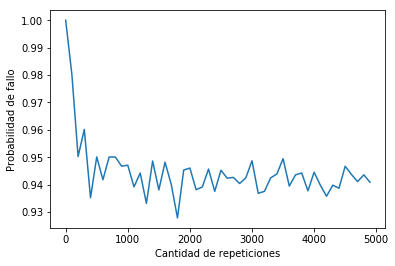

In [14]:
probFallo=[]
cantVeces = list(range(1,5000,100))
#calculamos cuantos aciertos existen y con esto cuantas veces falla para poder graficar los resultados
for i in cantVeces:
    k = 0
    acierto = 0
    while(k < i):
        p = random.random()
        if(p < p1):
            p = random.random()
            if(p < p2):
                p = random.random()
                if(p < p3):
                    p = random.random()
                    if(p < p4):
                        p = random.random()
                        if(p < p5):
                            acierto += 1
        k+=1

    probFallo.append((i-acierto)/i)
plt.plot(cantVeces,probFallo)
plt.ylabel('Probabilidad de fallo')
plt.xlabel('Cantidad de repeticiones')
plt.show()

Del gráfico entregado, podemos decir que a medida que aumentamos las repeticiones, la probabilidad de fallo disminuye, lo cual tiene lógica, ya que mientras más repetimos el experimento, existe mayor probabilidad de que alguna bolita termine el trayecto completo. Si consideramos muchísimas repeticiones, convergería a una probabilidad igual o muy cercana (nuestro caso) a la teórica.

> b) Si usted cuenta con 1000 bolitas, estime tanto téorica como empíricamente cuántas bolitas fallan en cada etapa. Compare sus resultados obtenidos.

*Recuerde que habrá una cantidad de bolitas que no fallarán*

Para estimar teóricamente cuántas bolitas fallan en cada etapa, supondremos que en cada etapa se pierde cierta cantidad de bolitas y se calculará la siguiente etapa con la cantidad que queda, obteniendo así:

In [15]:
bolitas=1000
fallas=bolitas-bolitas*p1
bolitas=bolitas*p1
print("En la primera etapa fallaron",fallas)
fallas=bolitas-bolitas*p2
bolitas=bolitas*p2
print("En la segunda etapa fallaron",fallas)
fallas=bolitas-bolitas*p3
bolitas=bolitas*p3
print("En la tercera etapa fallaron",fallas)
fallas=bolitas-bolitas*p4
bolitas=bolitas*p4
print("En la cuarta etapa fallaron",fallas)
fallas=bolitas-bolitas*p5
bolitas=bolitas*p5
print("En la quinta etapa fallaron",fallas)

En la primera etapa fallaron 400.0
En la segunda etapa fallaron 240.0
En la tercera etapa fallaron 72.0
En la cuarta etapa fallaron 96.0
En la quinta etapa fallaron 134.4


Para saber cuántas bolitas de 1000 fallan empíricamente en cada etapa, simularemos la máquina, viendo cuantas van quedando:

In [16]:
aciertos=0
i=0
bolitas=1000
#simulamos que las bolitas que no pasan se pierden, por lo que la siguiente probabilidad se 
#calcula con las bolitas que van quedando
while(i<1000):
    p=random.random()
    if(p<p1):
        aciertos+=1
    i+=1
bolitas=aciertos #cantidad de bolitas que quedan
fallas=1000-bolitas
print("En la primera etapa fallaron",fallas)
i=0
aciertos=0
while(i<bolitas):
    p=random.random()
    if(p<p2):
        aciertos+=1
    i+=1
fallas=(bolitas-aciertos)
bolitas=aciertos #bolitas que pasaron a la etapa 3
print("En la segunda etapa fallaron",fallas)
i=0
aciertos=0
while(i<bolitas):
    p=random.random()
    if(p<p3):
        aciertos+=1
    i+=1
fallas=bolitas-aciertos
bolitas=aciertos #bolitas que pasaron a la etapa 4
print("En la tercera etapa fallaron",fallas)
i=0
aciertos=0
while(i<bolitas):
    p=random.random()
    if(p<p4):
        aciertos+=1
    i+=1
fallas=bolitas-aciertos
bolitas=aciertos #bolitas que pasaron a la etapa 5
print("En la cuarta etapa fallaron",fallas)
i=0
aciertos=0
while(i<bolitas):
    p=random.random()
    if(p<p5):
        aciertos+=1
    i+=1
fallas=bolitas-aciertos
bolitas=aciertos #bolitas que pasaron a la etapa 3
print("En la última etapa fallaron",fallas)

En la primera etapa fallaron 398
En la segunda etapa fallaron 247
En la tercera etapa fallaron 73
En la cuarta etapa fallaron 86
En la última etapa fallaron 139


Observando los resultados obtenidos de manera teórica y empírica, estos claramente coinciden con un margen de error en el experimento empírico debido a la cantidad de repeticiones, ya que si repitieramos el experimento infinitas veces, obtendríamos el mismo valor empírico.

> c) Determine la función de probabilidad que rige este fenómeno según todos los estados posibles de la bolita

Definiremos la función de probabilidad con dominio X, correspondiente a las etapas de la máquina y recorrido Rx, correspondiente a las probabilidades de fallar en cada etapa. Así, los estados de la máquina serán:

Etapa 0: la  bolita no falla en ninguna etapa.

Etapa 1: la bolita falla en la primera etapa.

Etapa 2: la bolita falla en la segunda etapa.

Etapa 3: la bolita falla en la tercera etapa.

Etapa 4: la bolita falla en la cuarta etapa.

Etapa 5: la bolita falla en la quinta etapa.


A continuación se definirá el dominio y recorrido de la función en el programa:

In [17]:
X=[0,1,2,3,4,5] #etapas de la máquina
Rx=[p1*p2*p3*p4*p5,1-p1,p1*(1-p2),p1*p2*(1-p3),p1*p2*p3*(1-p4),p1*p2*p3*p4*(1-p5)] #probabilidad de fallar en cada etapa
#cada posicion es la probabilidad de la etapa (la etapa corresponde al índice)

>d) Genere 1000 valores aleatorios que sigan la función de probabilidad que encontró en c), haga un histograma y compare con lo obtenido en b)

En el siguiente algoritmo ejecutaremos 1000 veces un evento, logrando captar en cada iteración en qué etapa la bolita fallaría.

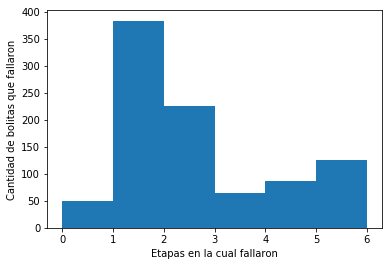

In [18]:
""""
En la primera etapa fallaron 400.0
En la segunda etapa fallaron 240.0
En la tercera etapa fallaron 72.0
En la cuarta etapa fallaron 96.0
En la quinta etapa fallaron 134.4
"""

i=0
bolitasF=[]
while(i<1000):
    p=random.random()
    if(p<Rx[0]):
        bolitasF.append(0)
    if(p<Rx[1]):
        bolitasF.append(1)
    if(p<Rx[2]):
        bolitasF.append(2)
    if(p<Rx[3]):
        bolitasF.append(3)
    if(p<Rx[4]):
        bolitasF.append(4)
    if(p<Rx[5]):
        bolitasF.append(5)
    i+=1
plt.hist(bolitasF,bins=[0,1,2,3,4,5,6])
plt.xlabel('Etapas en la cual fallaron')
plt.ylabel('Cantidad de bolitas que fallaron')
plt.show()

El histograma nos muestra entre qué etapas fallaron un determinado número de bolitas obtenidas a partir de ejecutar 1000 veces la función de probabiildad planteada. Los valores entre 0 y 1 representan el número de bolitas que lograron superar toda la máquina.

Comparando los resultados obtenidos con b), se puede decir que se acerca a los valores teóricos planteados y a los valores experimentales obtenidos, por lo cual la función obtenida se presenta como un buen modelo para representar el fenómeno de la máquina de Rube Goldberg propuesta.

## 3. Perritos Enfermos

Usted trabaja en un refugio de animales que se especializa en recibir perros, además de contar con el equipo necesario para tratar con enfermedades que estos puedan presentar. Viendo las noticias se enteró que un virus sumamente peligroso para los perros se está expandiendo rápidamente por la zona y sospecha que algunos de los perros bajo su cuidado pueden estar infectados pero, no presentan un síntoma de momento. Para suerte suya este virus tiene cura hace tiempo y cuenta con el equipo para analizar muestras de saliva para detectar qué perro está infectado con el virus o no.

Usted tiene 500 perros, para no hacer la prueba 1 a 1 ha decidido juntar muestras de saliva en grupos de $K$ perros (con $K$ siendo un divisor de 500), y en caso de que el examen arroje positivo hará la prueba 1 a 1 del grupo. Asuma que 8 perros están infectados, pero usted no sabe esto a priori.

>a) ¿Es posible determinar **teóricamente** un $K$ tal que la cantidad de veces que se realiza la prueba sea la menor posible? De ser así, encuentre dicho K. ¿Qué distribución es comparable a este fenómeno?

Según Wikipedia, la distribución hipergeométrica plantea una población de N elementos, divididos en dos categorías: d perteneciente a la categoría A y N-d a la categoría B. Dicho esto, podemos decir que este fenómeno se asemeja bastante, siendo d perteneciente a la categoría de perros enfermos y N-d perteneciente a la categoría de perros sanos.

>b) Encuentre **empíricamente** un valor de $K$ que minimice la cantidad de veces que se realiza la prueba y compare con el obtenido en b)

Realizaremos la simulación creando una lista con 500 elementos, donde 8 de ellos serán 'E' que representa un perro enfermo (insertados de manera aleatoria) y el resto 'S', que representa un perro sano.

In [33]:
perros = []
pruebasK = []
perrosPorGrupo = [1, 2, 4, 5, 10, 20, 25, 50, 100, 125, 250, 500]
j = 0
i = 0
while(j < 500): #llenamos la lista con perros sanos
    perros.append('S') #S es un perro sano, E es un perro enfermo
    j += 1
while(i < 8): #agregamos un perro enfermo en una posicion aleatoria entre 0 y 499
    perroEnfermo = random.randint(0,500)
    if(perros[perroEnfermo] != 'E'):
        perros[perroEnfermo] = 'E'
        i += 1
################################
#realizamos la simulación al ir probando con los distintos grupos y en cual se obtiene menor cantidad de 
#perros revisados 1 a 1
repeticiones=0
for K in perrosPorGrupo:
    cont = 0
    perrosRevisados = 0
    flag = True
    while(flag):
        if(cont != 500):
            repeticiones+=1
            if('E' in perros[cont:cont+K]):
                perrosRevisados += K
            cont += K
        else:
            pruebasK.append(perrosRevisados + 500/K)
            flag = False
minimo = pruebasK.index(int(min(pruebasK)))
print("El K que minimiza la revisión de perros es K =",perrosPorGrupo[minimo])
print("Iteraciones totales: ",repeticiones)

El K que minimiza la revisión de perros es K = 10
Iteraciones totales:  1092


Como se puede observar, el K que minimiza la cantidad de revisiones es K = 10. Esto se puede explicar en dos razones:

1.- Al no saber cuantos perros enfermos hay, se revisarán todas las mezclas salivales de los grupos.

2.- Si hay algún perro enfermo en un grupo, se revisará a todos los perros que hay en este (por el inciso 1).

Con esto, la cantidad de veces que se realizarán revisiones será la cantidad de grupos mas la cantidad de perros que hay por grupo infectado. Y esta revisión será mínima cuando la cantidad de grupos revisados mas los perros por grupo infectado sea mínimo.

>c) Ahora usted conoce la cantidad de perros infectados, realice el mismo experimento que en b) y compare sus resultados. ¿A qué se debe esta diferencia? 

Ahora que conocemos la cantidad de perros infectados, la idea es encontrar el K que haga más eficiente la búsqueda de los 8 perros y detenerse una vez encontrado los 8 perros.

In [34]:
pruebasK=[]
repeticiones=0
#realizamos la simulación al ir probando con los distintos grupos y en cual se obtiene menor cantidad de 
#perros revisados 1 a 1
#esta vez, termina una vez recorrida la lista o alcanzado los 8 perros, lo que pase antes
for K in perrosPorGrupo:
    cont = 0
    perrosRevisados = 0
    flag = True
    i=0
    while(flag):
        if(cont != 500 and i<8):
            repeticiones+=1
            if('E' in perros[cont:cont+K]):
                perrosRevisados += K
                for perro in perros[cont:cont+K]:
                    if (perro == 'E'):
                        i+=1
            cont += K
        else:
            pruebasK.append(perrosRevisados + 500/K)
            flag = False
minimo = pruebasK.index(int(min(pruebasK)))
print("El K que minimiza la revisión de perros es K =",perrosPorGrupo[minimo])
print("Iteraciones totales: ",repeticiones)

El K que minimiza la revisión de perros es K = 10
Iteraciones totales:  916


Como era de esperarse, el resultado es el mismo, la única diferencia es que el hecho de saber la cantidad de perros enfermos hace más eficiente el proceso, ya que una vez encontrados los 8 perros, no es necesario seguir iterando. A modo de demostración, en el inciso b) y c) mostramos el número de iteraciones totales para determinar K empíricamente, donde en este caso se muestra una reducción no despreciable aunque variable dependiendo de la distribución de los perros enfermos.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día 27 de Abril a las 15hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)